# Redes neuronales Basicas
Parte 1 - python y numpy


## Importar las librerías relevantes

In [1]:
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# observaciones = 1000
observaciones = 100000

x1 = np.random.uniform(low = -10, high = 10, size = (observaciones,1))
x2 = np.random.uniform(-10, 10, (observaciones,1)) # nótese que no se requieren las palabras clave

X = np.column_stack((x1,x2))



In [3]:
ruido = np.random.uniform(-1, 1, (observaciones,1))

# y = 2 * x1 - 3 * x2 + 5 + ruido

y= 13 * x1 + 7 * x2 - 12 + ruido

In [4]:
np.savez('Datos_TF', entradas = X, targets = y)  # nótese que se puede usar cualquier nombre

In [5]:
# Se cargan los datos desde el archivo NPZ.  Por supuesto, esto no era necesario acá
datos = np.load('Datos_TF.npz')

In [6]:
tamanio_entrada = 2

tamanio_salida = 1

In [7]:
learning_rates = [0.0001, 0.001, 0.1, 1]

for lr in learning_rates:
    modelo = tf.keras.Sequential([
                            
                                tf.keras.layers.Dense(tamanio_salida,
                                                    kernel_initializer = tf.random_uniform_initializer(minval = -0.1, maxval = 0.1),
                                                    bias_initializer = tf.random_uniform_initializer(minval = -0.1, maxval = 0.1)
                                                    )
                                ])

In [8]:
optimizador_adhoc = tf.keras.optimizers.SGD(learning_rate = 0.02)

In [9]:
# modelo.compile(optimizer = optimizador_adhoc, loss='mean_squared_error')
modelo.compile(optimizer = optimizador_adhoc, loss=tf.keras.losses.Huber())

In [10]:
modelo.fit(datos['entradas'], datos['targets'], epochs = 100, verbose = 2)

Epoch 1/100
3125/3125 - 4s - loss: 9.5099 - 4s/epoch - 1ms/step
Epoch 2/100
3125/3125 - 3s - loss: 0.3806 - 3s/epoch - 973us/step
Epoch 3/100
3125/3125 - 3s - loss: 0.3804 - 3s/epoch - 1ms/step
Epoch 4/100
3125/3125 - 3s - loss: 0.3843 - 3s/epoch - 1ms/step
Epoch 5/100
3125/3125 - 3s - loss: 0.3813 - 3s/epoch - 954us/step
Epoch 6/100
3125/3125 - 3s - loss: 0.3796 - 3s/epoch - 955us/step
Epoch 7/100
3125/3125 - 3s - loss: 0.3810 - 3s/epoch - 985us/step
Epoch 8/100
3125/3125 - 3s - loss: 0.3834 - 3s/epoch - 953us/step
Epoch 9/100
3125/3125 - 3s - loss: 0.3818 - 3s/epoch - 951us/step
Epoch 10/100
3125/3125 - 3s - loss: 0.3816 - 3s/epoch - 944us/step
Epoch 11/100
3125/3125 - 3s - loss: 0.3810 - 3s/epoch - 975us/step
Epoch 12/100
3125/3125 - 3s - loss: 0.3847 - 3s/epoch - 954us/step
Epoch 13/100
3125/3125 - 3s - loss: 0.3788 - 3s/epoch - 945us/step
Epoch 14/100
3125/3125 - 3s - loss: 0.3823 - 3s/epoch - 1ms/step
Epoch 15/100
3125/3125 - 3s - loss: 0.3801 - 3s/epoch - 952us/step
Epoch 16/100

In [11]:
modelo.layers[0].get_weights()    # el cero (0) es porque solo tenemos una capa

[array([[12.994048],
        [ 6.965722]], dtype=float32),
 array([-12.022193], dtype=float32)]

In [12]:
pesos = modelo.layers[0].get_weights()[0]
pesos

array([[12.994048],
       [ 6.965722]], dtype=float32)

In [13]:

sesgos = modelo.layers[0].get_weights()[1]
sesgos

array([-12.022193], dtype=float32)

In [14]:
print("pesos", pesos)
print("sesgos", sesgos)

pesos [[12.994048]
 [ 6.965722]]
sesgos [-12.022193]


In [15]:
modelo.predict_on_batch(datos['entradas']).round(1)[:5, :]

array([[-9.2],
       [53.5],
       [98.8],
       [59.5],
       [43.2]], dtype=float32)

In [16]:
datos['targets'].round(1)[:5, :]

array([[-8.5],
       [53. ],
       [98.4],
       [60.5],
       [43.3]])

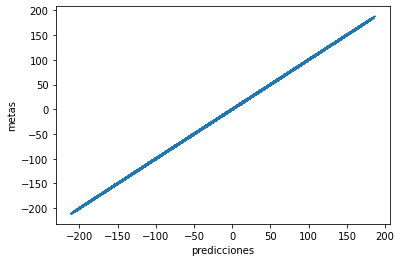

In [17]:
plt.plot(np.squeeze(modelo.predict_on_batch(datos['entradas'])), 
         np.squeeze(datos['targets']))
plt.xlabel('predicciones')
plt.ylabel('metas')
plt.show()

In [18]:
fig = px.scatter(x = np.squeeze(modelo.predict_on_batch(datos['entradas'])), 
                 y =  np.squeeze(datos['targets']))

fig.update_layout(
    title="Comparación predicciones vrs metas",
    xaxis_title="Predicciones",
    yaxis_title="Metas",
    width = 600,
    height = 400,)

fig.show()

### 1) Cambie el número de observaciones a 100,000. ¿Qué ocurre?

<font color='blue'>
R// El tiempo de ejecucion se ve aumentado, esto debido a que mas observaciones significa mas interaciones y esto causa que esto tome mucho mas tiempo en hacerse. Aunque esto tambien deriva que el modelo sea mas preciso.
</font>

### 2) “Juegue” un poco con la tasa de aprendizaje. Los valores como 0.0001, 0.001, 0.1, 1 son interesantes para observar ¿Qué diferencias se observan? ¿Se comporta bien el algoritmo?

<font color='blue'>
R// Ya jugue con los valores, y puedo decir que la tasa de aprendizaje se ve afectada, no hay una diferencia sobre todo con 0.0001 y 0.001, y se logran adaptar de buena manera al modelo pero sin embargo hay un cambio cuando llego a 0.1 y a 1, viendo que el modelo no se adapta de manera correcta.
</font>

### 3) Cambie la función de pérdida. Una función altenativa es la “Huber Loss”. ¿Cómo se comparan los resultados al cambiar la función de pérdida?

<font color='blue'>
R// Los resultados muestran que existe resultados positivo, por lo que se puede decir que la perdida de Huber funciona de mejor manera cuando tenemos mas datos atipicos, cosa a denotar.
</font>
